In [ ]:
# Hello and welcome to a new geoprogramming video
# today, we will have an introduction to a popular python package for raster data
# welcom to your first script with rasterio

In [ ]:
# as you know, usually I do my videos in local. in this case, due to some dependencies that this package has with GDAL

I recomend you to use a virtual enviorment to manage your python packages, or directly to use colab (you just need a google accound to use this). let's start

In [1]:
# as always, the first thing we need is to install the package with 

!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [2]:
# second step will be to lad the package

import rasterio

In [3]:
# and we can start coding. We can use rasters from local, but I guess that the eassiest is to use some .tif online
# so we are going to use Moodis data (will keep some links in the description, but it is this)
# cool datasets over there
# let's start from the band 1 of moodis

url_b1 = 'https://modis-pds.s3.amazonaws.com/MCD43A4.006/11/08/2019059/MCD43A4.A2019059.h11v08.006.2019072203257_B01.TIF'


In [4]:
dataset = rasterio.open(url_b1)

# by providing the link of the tif to the open function of rasterio, we had open the raster in the variable dataset,
# from here, we can check it's attributes

In [5]:
dataset.name


'https://modis-pds.s3.amazonaws.com/MCD43A4.006/11/08/2019059/MCD43A4.A2019059.h11v08.006.2019072203257_B01.TIF'

In [6]:
dataset.count
# this is to know how many bands do we have here

1

In [7]:
dataset.bounds
# bounderings of the raster

BoundingBox(left=-7783653.637667, bottom=0.0, right=-6671703.118, top=1111950.519667)

In [8]:
dataset.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not_specified_based_on_custom_spheroid",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [ ]:
# crs information in WKT. Let me know if you thing it is interesting to have a video about WKT

In [9]:
# those are just few examples, but there are many functions you can use here, just check the documentation (link in description)
# or remember that you can check a package functions with dir(rasterio)

# when we are done with a raster, we can close it

dataset.close()

this way of opening a dataset is quite consuming for the memory, as you are loading all the attributes from it but just using few of them, so there is annother way to open it, take whatever we want and then it will be closed

In [10]:
with rasterio.open(url_b1)  as dataset:
  # everything that happen here is with src as we had dataset before, in fact we can change it to make it more clear
  # once we are out of the with, it is close
  # in
  # let's read the band here and plot it outside (as we don't need the whole dataset for that)
  band1 = dataset.read(1)
#out

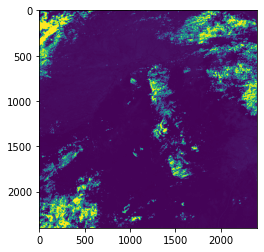

In [11]:
# to plot the band we can import show
from rasterio.plot import show

show(band1)

In [12]:
# here we go
# what we can do with rasterio is modify raster, I will show you a clasic example of ndvi calculation with it
# to do so we need annother band, in this case the second one
# basically the band 1 is red and we need nir
# so

url_b2 = 'https://modis-pds.s3.amazonaws.com/MCD43A4.006/11/08/2019059/MCD43A4.A2019059.h11v08.006.2019072203257_B02.TIF'


In [13]:
with rasterio.open(url_b2)  as dataset:
  band2 = dataset.read(1)

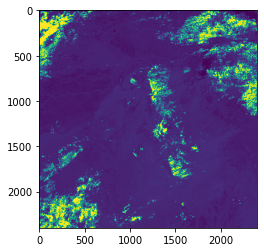

In [14]:
show(band2)

In [15]:
# to do the ndvi calculation here is pretty eassy (b2-b1)/(b2+b1) is I'm not wrong

ndvi = (band2-band1)/(band2+band1)

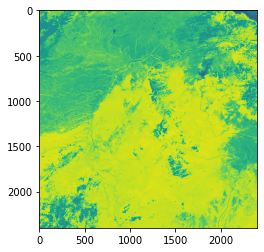

In [16]:
show(ndvi)

In [ ]:
# and here it is, easy and fast. in this case the calculation was clear and easy as the extension, transform, crs, and so on was the same
# but it may happen that any (of all) of those are different, then you need to apply changes based on the attributes
# let me know if you will be interested in a video about that
# that is all from this video, thank you for watching, byeeee